In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Import csv file in pandas frame.

In [4]:
df = pd.read_csv( r"D:\ML-Projects\Notebook\data\stud.csv")

In [14]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [15]:
print("Catergories in Gender varialbe: ", end=" ")
print(df['gender'].unique())

print("Categories in 'race_ethnicity'  variable: ", end=" ")
print(df['race_ethnicity'].unique())

print("Categories in 'lunch' variable: ", end=" ")
print(df['lunch'].unique())

Catergories in Gender varialbe:  ['female' 'male']
Categories in 'race_ethnicity'  variable:  ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'lunch' variable:  ['standard' 'free/reduced']


In [16]:
#define numerical and categorical features
numeric_feature = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_feature = [feature for feature in df.columns if df[feature].dtype == 'O']

In [17]:
#print columns
print("We have {} numeric features: {}".format(len(numeric_feature),numeric_feature))
print("We have {} categorical features: {}".format(len(categorical_feature), categorical_feature))

We have 3 numeric features: ['math_score', 'reading_score', 'writing_score']
We have 5 categorical features: ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [18]:
#Adding column for total score and average
df['total_score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average'] = (1/3)*df['total_score']

In [19]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [20]:
writing_full = df[df['writing_score'] == 100] ['average'].count()
print(f'Number of students get full marks in writing: ', writing_full)

reading_full = df[df['reading_score'] == 100] ['average'].count()
print(f'Number of student got full marks in reading: ', reading_full)

math_full = df[df['math_score'] == 100]['average'].count()
print(f'Number of students get full marks in mathematics: ', math_full)

Number of students get full marks in writing:  14
Number of student got full marks in reading:  17
Number of students get full marks in mathematics:  7


In [21]:
writing_fail = df[df['writing_score']<33] ['average'].count()
print(f'Number students failed in the writing exam: ', writing_fail)

reading_fail = df[df['reading_score'] < 33]['average'].count()
print(f'Number of students failed in the reading exam: ', reading_fail)

math_fail = df[df['math_score'] <33] ['average'].count()
print('Number of students failed in math exam: ', math_fail)

Number students failed in the writing exam:  12
Number of students failed in the reading exam:  11
Number of students failed in math exam:  19


### Visualize data with histogram.....

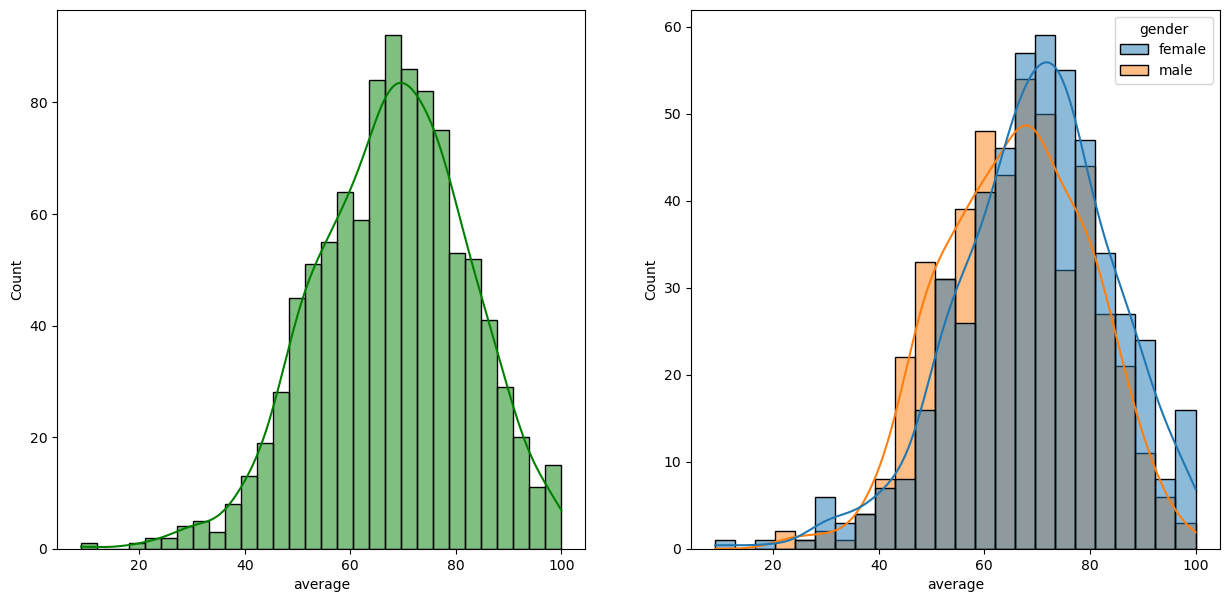

In [22]:
figs, axs = plt.subplots(1,2, figsize=(15,7) )
plt.subplot(121)
sns.histplot(data=df, x='average', bins=30, kde=True, color='g')
plt.subplot(122)
sns.histplot(data=df, x='average', kde=True, hue='gender')
plt.show()

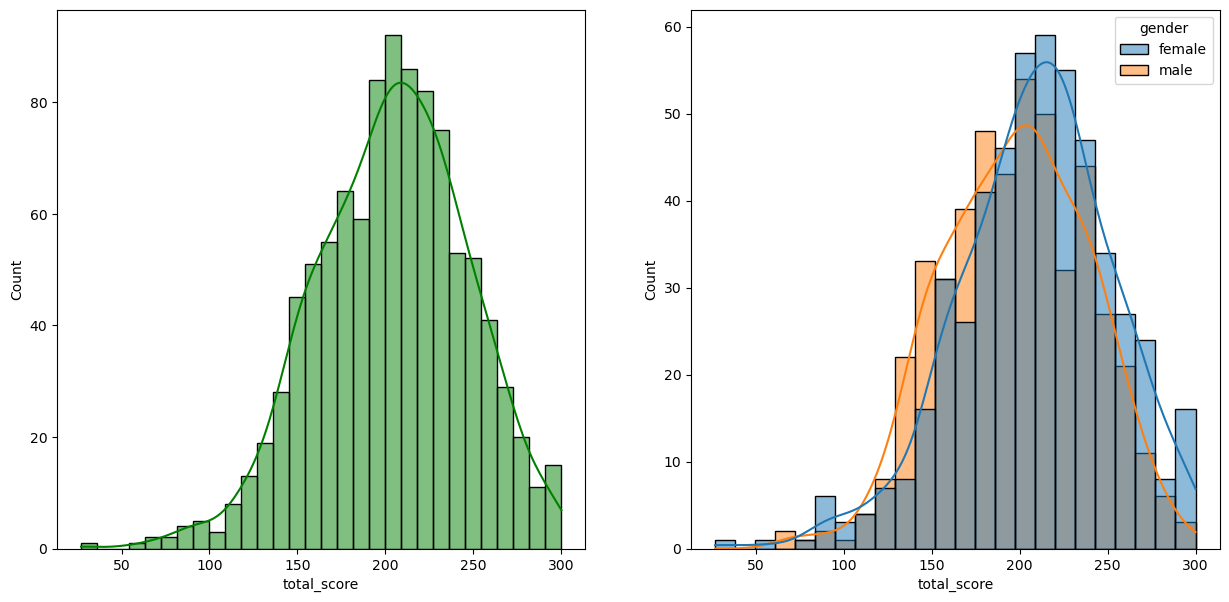

In [23]:
figs, axs = plt.subplots(1,2, figsize=(15,7) )
plt.subplot(121)
sns.histplot(data=df, x='total_score', bins=30, kde=True, color='g')
plt.subplot(122)
sns.histplot(data=df, x='total_score', kde=True, hue='gender')
plt.show()

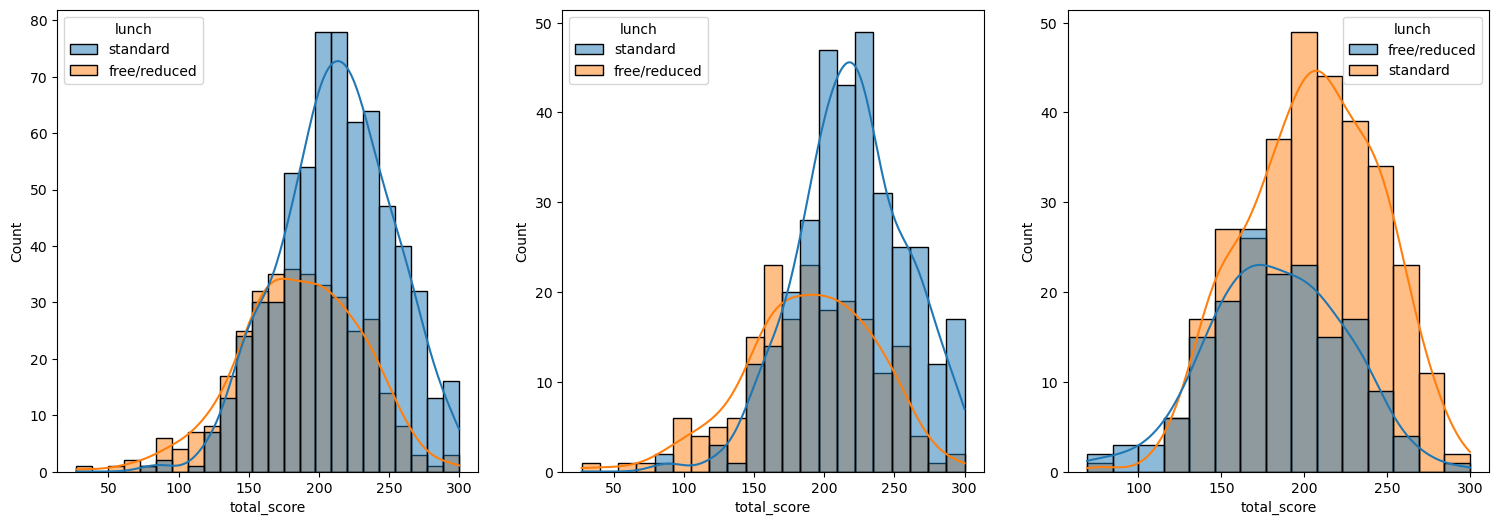

In [27]:
plt.subplots(1,3, figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='total_score', kde=True, hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'], x= 'total_score',kde=True, hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'], x='total_score', kde=True,hue='lunch')
plt.show()

In [47]:
# Check missing values 
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
total_score                    0
average                        0
dtype: int64

In [49]:
# Checking the unique values
df.nunique()

gender                           2
race_ethnicity                   5
parental_level_of_education      6
lunch                            2
test_preparation_course          2
math_score                      81
reading_score                   72
writing_score                   77
total_score                    194
average                        194
dtype: int64

In [5]:
# Show the statistics
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [12]:
print("Categories in 'gender' variable: ", end=" ")
print(df['gender'].unique())

print("Categories in 'race_ethnicity' variable: ", end=" ")
print(df['race_ethnicity'].unique())

print("categories in 'parental_level_of_education' variable: ", end=" ")
print(df["parental_level_of_education"].unique())

print("Categories in 'lunch' variable: ", end=" ")
print(df['lunch'].unique())

print("Categories in 'math_score' variable: ", end=" ")
print(df['math_score'].unique())

print("Ctegories in 'reading_score' variable: ", end=" ")
print(df['reading_score'].unique())

print("Categories in 'test_preparation_course' variable: ", end=" ")
print(df['test_preparation_course'].unique())

print("Categories in 'writing_score' variable: ", end=" ")
print(df['writing_score'].unique())

Categories in 'gender' variable:  ['female' 'male']
Categories in 'race/ ethnicity' variable:  ['group B' 'group C' 'group A' 'group D' 'group E']
categories in 'parental_level_of_education' variable:  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:  ['standard' 'free/reduced']
Categories in 'math_score' variable:  [ 72  69  90  47  76  71  88  40  64  38  58  65  78  50  18  46  54  66
  44  74  73  67  70  62  63  56  97  81  75  57  55  53  59  82  77  33
  52   0  79  39  45  60  61  41  49  30  80  42  27  43  68  85  98  87
  51  99  84  91  83  89  22 100  96  94  48  35  34  86  92  37  28  24
  26  95  36  29  32  93  19  23   8]
Ctegories in 'reading_score' variable:  [ 72  90  95  57  78  83  43  64  60  54  52  81  53  75  89  32  42  58
  69  73  71  74  70  65  87  56  61  84  55  44  41  85  59  17  39  80
  37  63  51  49  26  68  45  47  86  34  79  66  67  91 100  76  77  82
